# Лабораторная работа №0
### Дьячков Вадим, 33501/4

### Цели работы
1. Научиться формировать выборки, состоящие из обучающих и тестовых примеров для решения типовых задач классификации, аппроксимации.
2. Овладеть навыками визуализации данных на плоскости при решении задач классификации и аппроксимации.
3. Научиться рассчитывать основные показатели качества распознавания и представлять полученные результаты в табличной и графической формах.

### Инициализация окружения

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, train_test_split
from sklearn.datasets import load_digits
from scipy.ndimage.interpolation import rotate, shift
from scipy.io import savemat

np.random.seed(42)
sns.set(font_scale=1.25)

BLUE = '#0074D9'
RED = '#FF4136'

MATPATH = '../../lab1/code/matlab/'

PIC_NUM = 1
def save():
    global PIC_NUM
    plt.savefig('../pics/' + str(PIC_NUM), bbox_inches='tight')
    PIC_NUM += 1

## №1. Крестики-нолики

### Задание 1

Разделим таблицу $4\times 4$ на крестики и нолики так, чтобы классы "O" и "X" были линейно неразделимы:

\begin{cases}
y = f(X)\\
X = [x_1, x_2]\\
x_i \in \{1, 2, 3, 4\}\\
y_i \in \{0, 1\}
\end{cases}

In [2]:
grid = np.array([['O' if np.random.random() > 0.5 else 'X' for i in range(4)] for j in range(4)])
grid

array([['X', 'O', 'O', 'O'],
       ['X', 'X', 'X', 'O'],
       ['O', 'O', 'X', 'O'],
       ['O', 'X', 'X', 'X']], 
      dtype='<U1')

In [3]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return grid[x[0] - 1, x[1] - 1]
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [4]:
fun(np.array([1, 2])), fun([4, 4])

('O', 'X')

### Задание 2

In [5]:
P = np.array(list(itertools.product([1, 2, 3, 4], repeat=2)))
T = fun(P)

print('x1 x2    y')
for i in range(len(P)):
    print(P[i], '->', T[i][0])

x1 x2    y
[1 1] -> X
[1 2] -> O
[1 3] -> O
[1 4] -> O
[2 1] -> X
[2 2] -> X
[2 3] -> X
[2 4] -> O
[3 1] -> O
[3 2] -> O
[3 3] -> X
[3 4] -> O
[4 1] -> O
[4 2] -> X
[4 3] -> X
[4 4] -> X


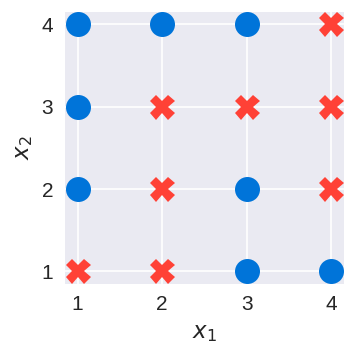

In [6]:
plt.figure(figsize=(3, 3), dpi=120)
for i in range(len(P)):
    x1, x2 = P[i]
    y = T[i][0]
    m = 'X' if y == 'X' else 'o'
    c = BLUE if y == 'O' else RED
    plt.plot(x1, x2, m, markersize=15, color=c)
plt.xticks([1, 2, 3, 4])
plt.yticks([1, 2, 3, 4])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

In [7]:
savemat(MATPATH + '1.mat', mdict={'P': P, 'T': T})

## №2. Логическая функция 5 переменных

### Задание 1

Зададим логическую функцию 5 переменных так, чтобы множество ее выходных значений 0 и 1 было линейно неразделимым:

\begin{cases}
	y = f(X)\\
	X = [x_1, x_2, x_3, x_4, x_5]\\
	x_i \in \{0, 1\}\\
	y_i \in \{0, 1\}
\end{cases}

In [8]:
grid = {'{0:05b}'.format(i): 0 if np.random.random() > 0.25 else 1 
        for i in range(32)}

In [9]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        return grid[''.join([str(i) for i in x])]
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [10]:
grid

{'00000': 0,
 '00001': 0,
 '00010': 0,
 '00011': 0,
 '00100': 0,
 '00101': 1,
 '00110': 0,
 '00111': 0,
 '01000': 0,
 '01001': 0,
 '01010': 1,
 '01011': 0,
 '01100': 0,
 '01101': 1,
 '01110': 0,
 '01111': 1,
 '10000': 1,
 '10001': 0,
 '10010': 0,
 '10011': 0,
 '10100': 0,
 '10101': 1,
 '10110': 0,
 '10111': 0,
 '11000': 1,
 '11001': 0,
 '11010': 1,
 '11011': 0,
 '11100': 0,
 '11101': 0,
 '11110': 0,
 '11111': 0}

In [11]:
fun([1, 1, 1, 1, 0]), fun([1, 1, 0, 1, 0])

(0, 1)

### Задание 2

In [12]:
P = np.array(list(itertools.product([0, 1], repeat=5)))
T = fun(P)

In [13]:
df = pd.DataFrame(np.column_stack((P, T)), columns=['x1', 'x2', 'x3', 'x4', 'x5', 'y'])
df.to_csv('../data/truth_table.csv', index=False)

In [14]:
for i in range(len(P)):
    print(P[i], '->', T[i][0])

[0 0 0 0 0] -> 0
[0 0 0 0 1] -> 0
[0 0 0 1 0] -> 0
[0 0 0 1 1] -> 0
[0 0 1 0 0] -> 0
[0 0 1 0 1] -> 1
[0 0 1 1 0] -> 0
[0 0 1 1 1] -> 0
[0 1 0 0 0] -> 0
[0 1 0 0 1] -> 0
[0 1 0 1 0] -> 1
[0 1 0 1 1] -> 0
[0 1 1 0 0] -> 0
[0 1 1 0 1] -> 1
[0 1 1 1 0] -> 0
[0 1 1 1 1] -> 1
[1 0 0 0 0] -> 1
[1 0 0 0 1] -> 0
[1 0 0 1 0] -> 0
[1 0 0 1 1] -> 0
[1 0 1 0 0] -> 0
[1 0 1 0 1] -> 1
[1 0 1 1 0] -> 0
[1 0 1 1 1] -> 0
[1 1 0 0 0] -> 1
[1 1 0 0 1] -> 0
[1 1 0 1 0] -> 1
[1 1 0 1 1] -> 0
[1 1 1 0 0] -> 0
[1 1 1 0 1] -> 0
[1 1 1 1 0] -> 0
[1 1 1 1 1] -> 0


In [15]:
savemat(MATPATH + '2.mat', mdict={'P': P, 'T': T})

## №3. Разбиение плоскости на 2 класса

### Задание 1

Разобьем прямоугольный участок плоскости с помощью отрезков прямых линий на два класса.

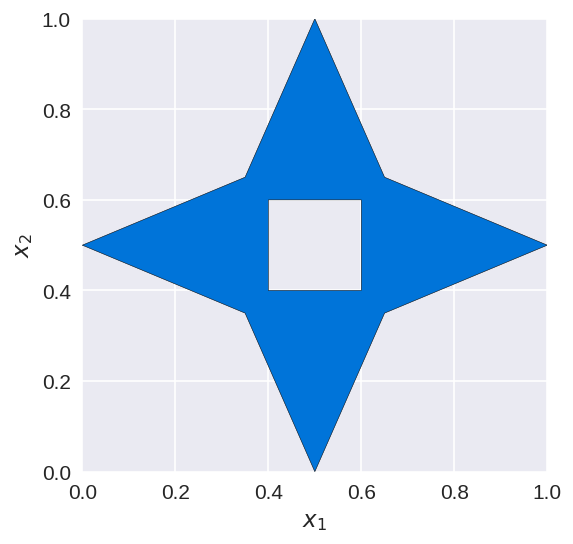

In [16]:
fig = plt.figure(figsize=(5, 5), dpi=120)
square = Polygon([(0.4, 0.4), (0.4, 0.6), (0.6, 0.6), (0.6, 0.4)])
polygon = Polygon([(0, 0.5), (0.35, 0.65), (0.5, 1), (0.65, 0.65), (1, 0.5), 
                   (0.65, 0.35), (0.5, 0), (0.35, 0.35), (0, 0.5)])
polygon = polygon.difference(square)

ax = fig.add_subplot(111)
ax.add_patch(PolygonPatch(polygon, fc=BLUE))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

In [17]:
def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        return 1 if polygon.contains(point) else 0
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

In [18]:
fun([0.5, 0.5]), fun([0.2, 0.2]), fun([0.5, 0.3]), fun([0.2, 0.5])

(0, 0, 1, 1)

### Задание 2

Сформируем матрицу входных значений $P$ в диапазоне рассматриваемого прямоугольного участка плоскости и найдем для нее вектор-столбец $T$, значения которого отвечают за номер класса (0 или 1). Изобразим сформированную выборку, причем красным цветом отметим значения, попадающие в область фигуры (1 класс).

In [19]:
X = np.linspace(0, 1, 41)
P = np.array(list(itertools.product(X, repeat=2)))
T = fun(P)
N = len(T)

In [20]:
def draw_scatter(X, Y, colors):
    plt.figure(figsize=(5, 5), dpi=120)
    cmap = ListedColormap(colors)
    m = 'D'
    plt.scatter(X.T[0], X.T[1], c=Y, s=10, marker=m, cmap=cmap)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    save()
    plt.show()

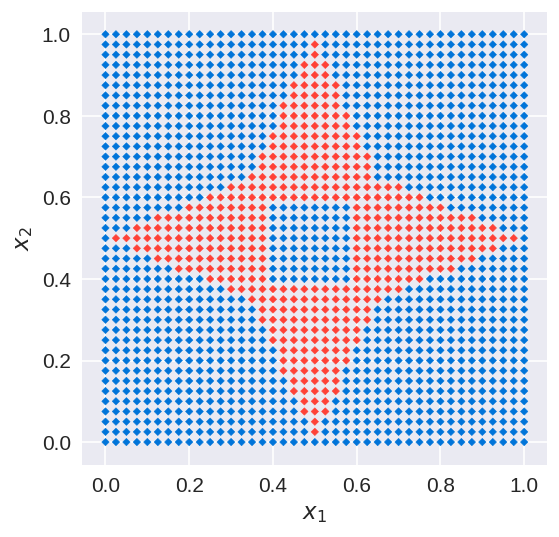

In [21]:
c = [BLUE, RED]
draw_scatter(P, T, c)

In [22]:
savemat(MATPATH + '3.mat', mdict={'P': P, 'T': T})

### Задание 3

Исказим сформированную ранее выборку $(P, T)$, проинвертировав значения $10\%$ случайно выбранных строк $T$, и будем интерпретировать эти данные, как ответ $Y$ некоторого распознающего устройства (классификатора). Изобразим полученную выборку $(P, Y)$.

In [23]:
k = 0.1 # 10%
idx = np.random.binomial(1, k, size=N) == 1 # logical array
Y = T.copy()
Y[idx] = 1 - T[idx]

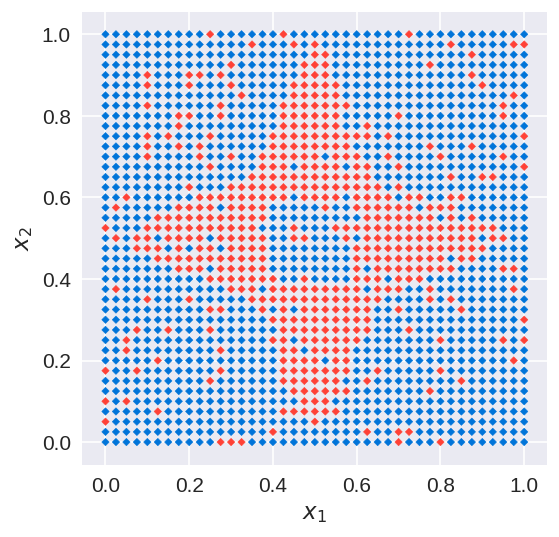

In [24]:
draw_scatter(P, Y, c)

На основании желаемых $T$ и реальных $Y$ ответов определим основные показатели качества распознавания:
- матрицу неточностей;
- среднюю вероятность ошибки и среднюю вероятность правильного распознавания;
- ошибки первого и второго рода, чувствительность, специфичность.

In [25]:
def draw_confusion_matrix(mat, w=5, h=3):
    cmap = ListedColormap(sns.color_palette("Blues", 10))
    ax = sns.heatmap(mat, annot=True, fmt="d", linewidths=0.5, cmap=cmap)
    ax.figure.set_size_inches(w, h)
    ax.figure.set_dpi(120)
    ax.xaxis.tick_top()
    ax.set_xticklabels(np.arange(1, mat.shape[0] + 1))
    ax.set_yticklabels(np.arange(mat.shape[1], 0, -1))
    ax.tick_params(axis='both', which='major', labelsize=8)
    save()
    plt.show()

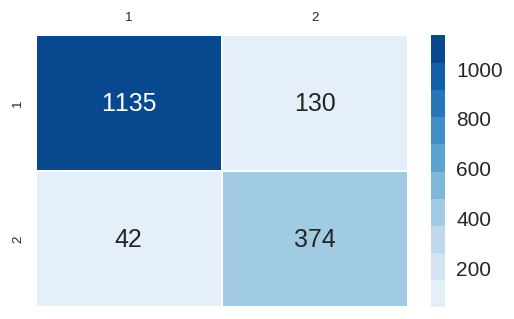

In [26]:
cm = confusion_matrix(T, Y)
draw_confusion_matrix(cm)

In [27]:
print('Средняя вероятность ошибки = {0:.2f}'.format((cm[0][1] + cm[1][0]) / N))
print('Средняя вероятность правильного распознавания = {0:.2f}'.format((cm[0][0] + cm[1][1]) / N))
print('Спецефичность = {0:.2f}'.format(cm[0][0] / N))
print('Чувствительность = {0:.2f}'.format(cm[1][1] / N))
print('Ошибка первого рода = {0:.2f}'.format(cm[0][1] / N))
print('Ошибка второго рода = {0:.2f}'.format(cm[1][0] / N))

Средняя вероятность ошибки = 0.10
Средняя вероятность правильного распознавания = 0.90
Спецефичность = 0.68
Чувствительность = 0.22
Ошибка первого рода = 0.08
Ошибка второго рода = 0.02


### Задание 4

Разделим выборку на обучающую и тестовую, выбрав случайно $33\%$ примеров как тестовые, а остальные – как обучающие. Полученное разделение изобразим, причем большими точками отметим примеры, попавшие в обучающую выборку, а маленькими - в тестовую.

In [28]:
k = 0.33  # 33% for test
X_train, X_test, y_train, y_test = train_test_split(P, T, test_size=k, random_state=42)

In [29]:
def draw_train_and_test_scatter(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(5, 5), dpi=120)
    cmap = ListedColormap([BLUE, RED])
    m = 'D'
    plt.scatter(X_train.T[0], X_train.T[1], c=y_train, s=10, marker=m, cmap=cmap)
    plt.scatter(X_test.T[0], X_test.T[1], c=y_test, s=1, marker=m, cmap=cmap)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    save()
    plt.show()

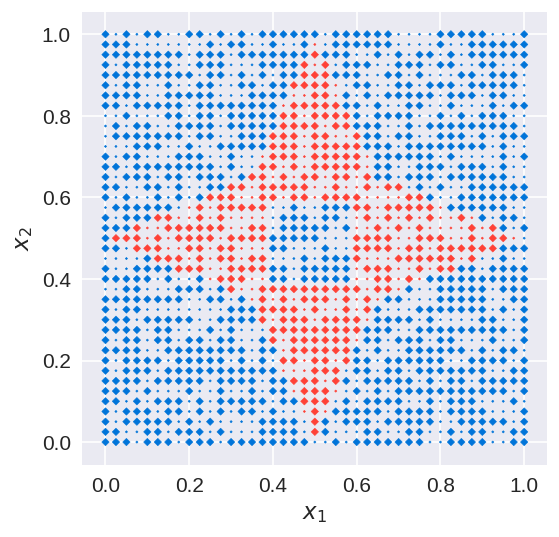

In [30]:
draw_train_and_test_scatter(X_train, X_test, y_train, y_test)

Применим __K-fold__ кросс-валидацию при $K=4$ к исходной выборке. Результат разбиения изобразим, причем большими точками отметим примеры, попавшие в обучающую выборку, а маленькими - в тестовую.

In [31]:
k = 4
kf = KFold(4, shuffle=True, random_state=42)

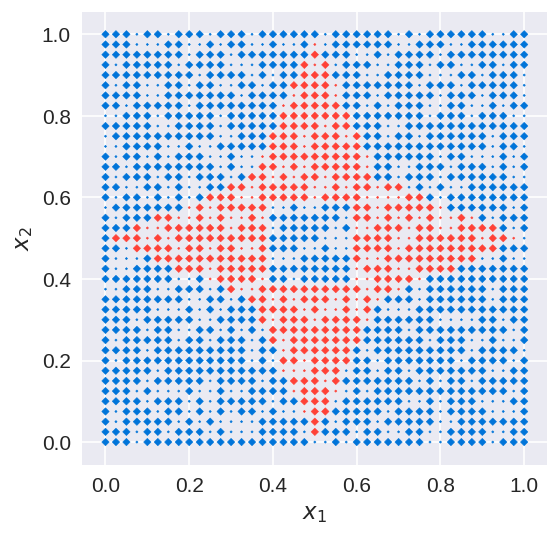

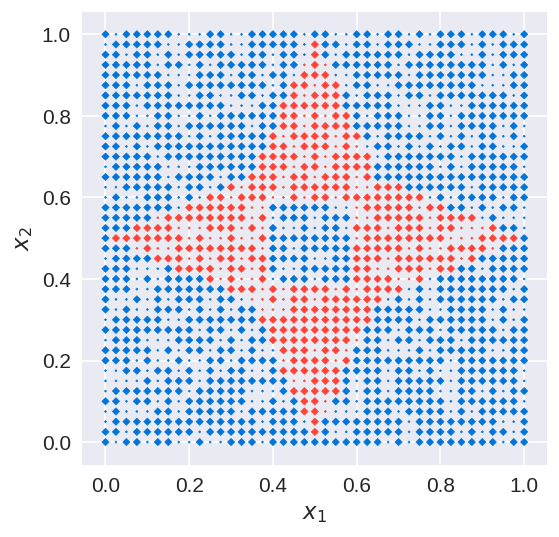

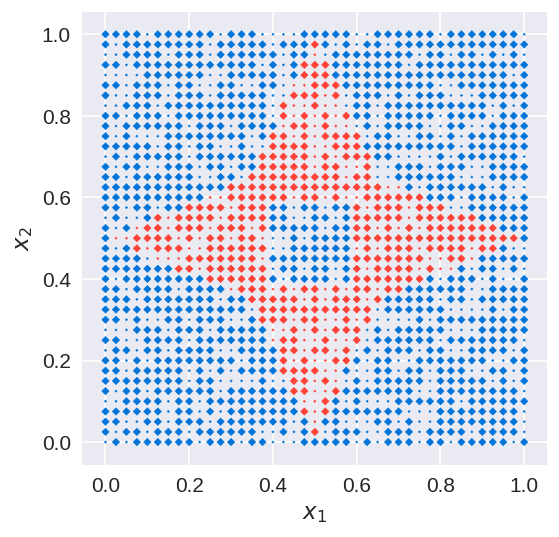

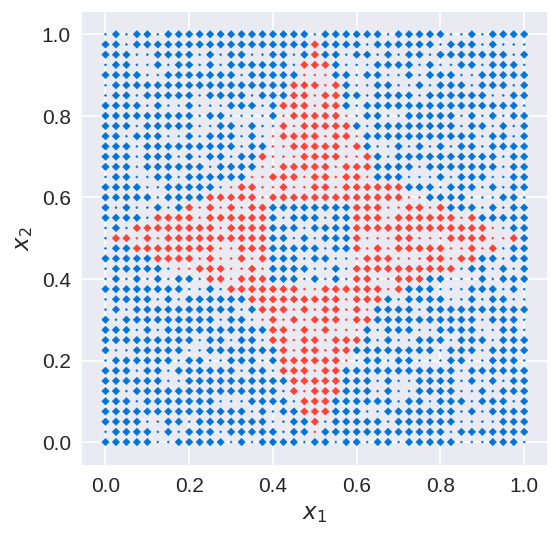

In [32]:
for train_index, test_index in kf.split(P):
    X_train, X_test = P[train_index], P[test_index]
    y_train, y_test = T[train_index], T[test_index]
    
    draw_train_and_test_scatter(X_train, X_test, y_train, y_test)

## №4. Разбиение плоскости на $n$ классов

### Задание 1

Разобьем прямоугольный участок плоскости с помощью отрезков прямых линий на 8 классов.

In [33]:
def get_position_for_text(polygon):
    coord = polygon.exterior.centroid.coords.xy
    return coord[0][0], coord[1][0]

polygons = {
    1: Polygon([(0, 0), (0, 1), (.4, .8)]),
    2: Polygon([(0, 1), (1, 1), (.8, .6)]),
    3: Polygon([(1, 1), (1, 0), (.6, .2)]),
    4: Polygon([(1, 0), (0, 0), (.2, .4)]),
    5: Polygon([(.2, .4), (.4, .8), (.5, .5)]),
    6: Polygon([(.4, .8), (.8, .6), (.5, .5)]),
    7: Polygon([(.6, .2), (.8, .6), (.5, .5)]),
    8: Polygon([(.2, .4), (.6, .2), (.5, .5)])
}

colors = {
    1: '#0074D9',
    2: '#39CCCC',
    3: '#2ECC40',
    4: '#F012BE',
    5: '#FF851B',
    6: '#FF4136',
    7: '#B10DC9',
    8: '#3D9970',
}

def fun(x):
    x = np.array(x)
    if len(x.shape) == 1:
        point = Point(x[0], x[1])
        for i, p in polygons.items():
            if point.distance(p) < 1e-8:
                return i
    else:
        return np.array([fun(xi) for xi in x])[np.newaxis].T

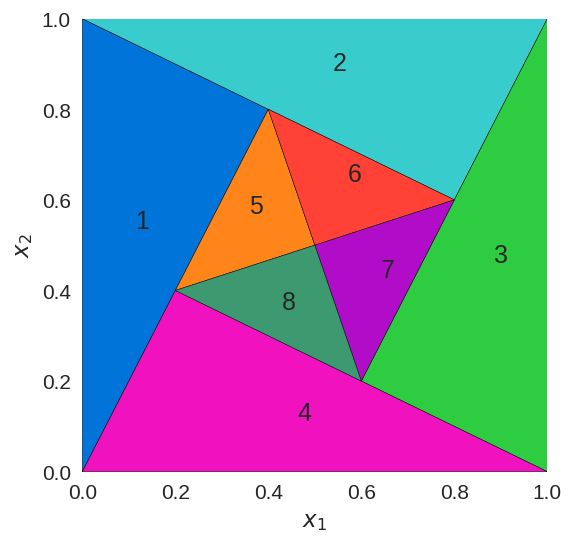

In [34]:
fig = plt.figure(figsize=(5, 5), dpi=120)
ax = fig.add_subplot(111)
for i, p in polygons.items():
    ax.add_patch(PolygonPatch(p, fc=colors[i]))
    ax.annotate(i, xy=get_position_for_text(p), size=15)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
save()
plt.show()

In [35]:
fun([0.9, 0.5]), fun([0.4, 0.6])

(3, 5)

### Задание 2

Сформируем матрицу входных значений $P$ в диапазоне рассматриваемого прямоугольного участка плоскости и найдем для нее вектор-столбец $T$, значения которого отвечают за номер класса ($1,\dotsc ,8$). Изобразим сформированную выборка, причем разные классы отметим разными цветами.

In [36]:
X = np.linspace(0, 1, 41)
P = np.array(list(itertools.product(X, repeat=2)))
T = fun(P)
N = len(T)

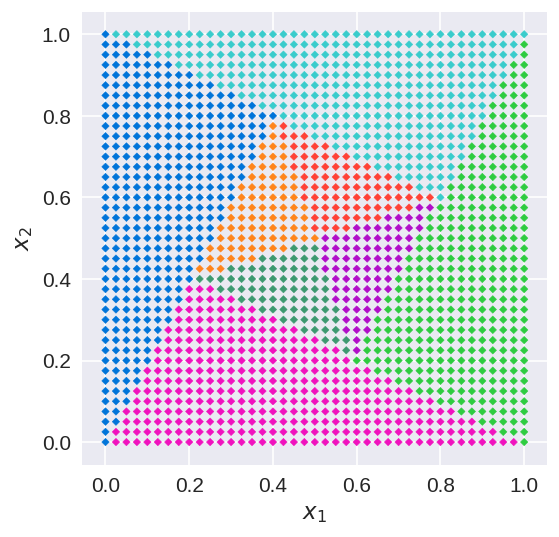

In [37]:
draw_scatter(P, T, colors.values())

In [38]:
savemat(MATPATH + '4.mat', mdict={'P': P, 'T': T})

### Задание 3

Исказим сформированную ранее выборку $(P, T)$, изменив значение $10\%$ случайно выбранных строк $T$ на случайные значения от 1 до 8, и будем интерпретировать эти данные, как ответ $Y$ некоторого распознающего устройства (классификатора). Изобразим полученную выборку $(P, Y)$.

In [39]:
k = 0.1 # 10%
M = len(polygons) # classes
idx = np.random.binomial(1, k, size=N) == 1 # logical array
rnd = np.random.randint(1, M, size=sum(idx))[np.newaxis].T
Y = T.copy()
Y[idx] = rnd

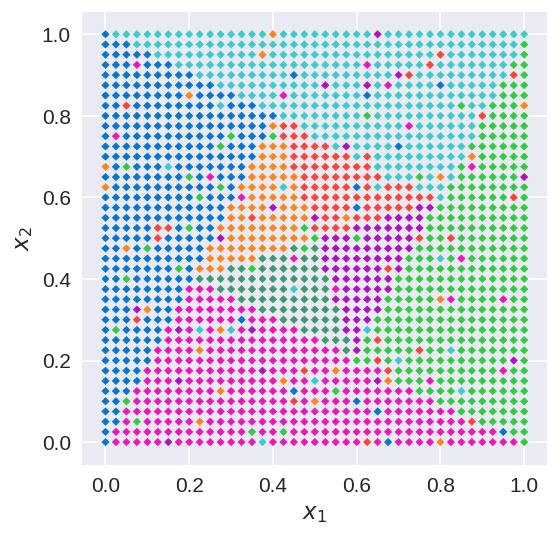

In [40]:
draw_scatter(P, Y, colors.values())

На основании желаемых $T$ и реальных $Y$ ответов определим основные показатели качества распознавания:
- матрицу неточностей;
- среднюю вероятность ошибки и среднюю вероятность правильного распознавания;
- ошибки первого и второго рода, чувствительность, специфичность.

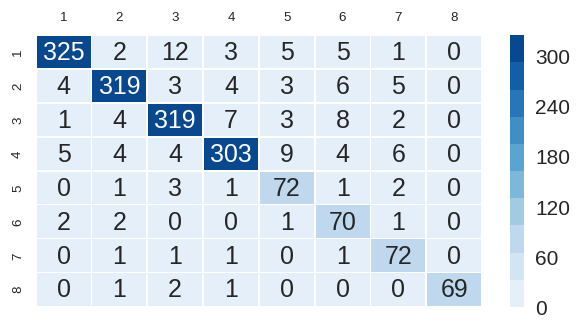

In [41]:
cm = confusion_matrix(T, Y)
draw_confusion_matrix(cm, 6, 3)

In [42]:
print('Средняя вероятность ошибки =', np.sum(np.diag(cm)) / N)
print('Средняя вероятность правильного распознавания =', (np.sum(cm) - np.sum(np.diag(cm))) / N)

Средняя вероятность ошибки = 0.921475312314
Средняя вероятность правильного распознавания = 0.0785246876859


In [43]:
def find_error(x, i):
    return (sum(x) - x[i]) / x[i]

first_type = np.array([find_error(cm.T[i], i) for i in range(M)])
second_type = np.array([find_error(cm[i], i) for i in range(M)])

for i in range(M):
    print('Класс {0}: 1 род = {1:.2f}, 2 род = {2:.2f}'.format(i+1, first_type[i], second_type[i]))

Класс 1: 1 род = 0.04, 2 род = 0.09
Класс 2: 1 род = 0.05, 2 род = 0.08
Класс 3: 1 род = 0.08, 2 род = 0.08
Класс 4: 1 род = 0.06, 2 род = 0.11
Класс 5: 1 род = 0.29, 2 род = 0.11
Класс 6: 1 род = 0.36, 2 род = 0.09
Класс 7: 1 род = 0.24, 2 род = 0.06
Класс 8: 1 род = 0.00, 2 род = 0.06


## №5. Непрерывная функция одной переменной

### Задание 1

Определим функцию одной переменной в интервале входных значений $x \in [0, 1]$, имеющую несколько экстремумов и колебания различной частоты. 

In [44]:
def fun(x):
    return (np.sin(50 * x) + np.sin(25 * x) + np.sin(10 * x) + np.cos(10 * x) + \
        np.exp(x - 1) + np.cosh(3 * (1-x)) + np.cosh(3 * x)) / 15

X = np.linspace(0, 1, 500)
Y = fun(X)

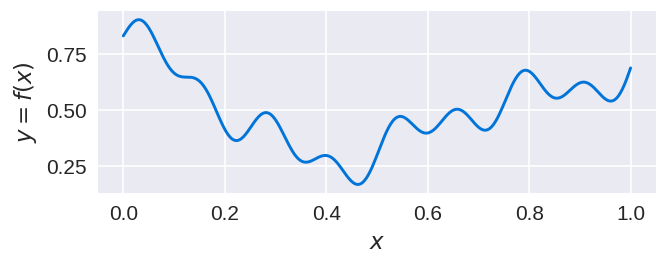

In [45]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(X, Y, '-', c=BLUE)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

### Задание 2

Сформируем множество входных значений $P$ в диапазоне возможных значений функции и определим соответствующие значения $T$. 

In [46]:
N = 100
P = np.linspace(0, 1, N)
T = fun(P)

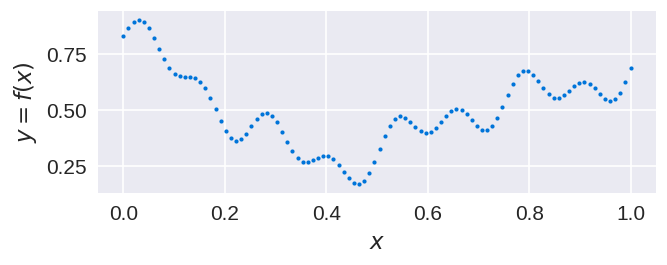

In [47]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(P, T, '.', markersize=5, c=BLUE)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

In [48]:
savemat(MATPATH + '5.mat', mdict={'P': P, 'T': T})

### Задание 3

Добавим к значениям $T$ равномерный шум амплитуды, равной $10\%$ от максимального значения. Будем интерпретировать полученный сигнал, как ответ $Y$ некоторого распознающего устройства (нейронной сети).

In [49]:
k = 0.1  # noise level
Y = T.copy()
Y += np.random.uniform(-k, k, size=N)

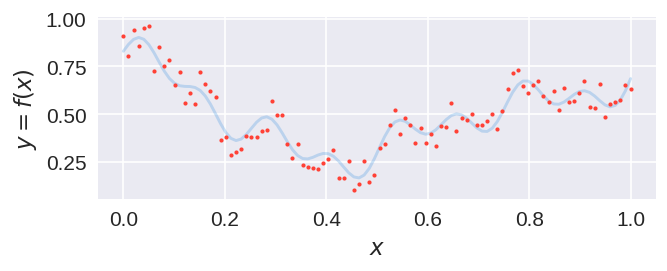

In [50]:
plt.figure(figsize=(6, 2), dpi=120)
plt.plot(P, T, '-', alpha=0.2, c=BLUE)
plt.plot(P, Y, '.', markersize=5, c=RED)
plt.xlabel('$x$')
plt.ylabel('$y=f(x)$')
save()
plt.show()

На основании желаемых $T$ и реальных $Y$ ответов определим основные показатели качества распознавания:
- среднюю абсолютную ошибку;
- среднюю относительную ошибку;
- максимальную по модулю ошибку.

In [51]:
error = np.abs(T - Y)
print('Средняя абсолютная ошибка = {0:.4f}'.format(error.mean()))
print('Средняя относительная ошибка = {0:.4f}'.format((error / Y).mean()))
print('Максимальная по модулю ошибка = {0:.4f}'.format(np.max(error)))

Средняя абсолютная ошибка = 0.0506
Средняя относительная ошибка = 0.1276
Максимальная по модулю ошибка = 0.0994


## №6a. Линейная функция с памятью

### Задание 1

Линейная функция с памятью:
$$ y[n] = \sum_{i=0}^{h-1} x[n - i\cdot d]\cdot k_i $$
где $h$ – ширина окна, $d$ – глубина задержек, $k_i$ – коэффициенты.

In [52]:
h = 8
d = 4
sign = [1 if x > 0.5 else -1 for x in np.random.random(size=h)]
k = np.random.random(size=8) * sign
for i in range(len(k)):
    print('k{0} = {1:.3f}'.format(i, k[i]))

k0 = 0.183
k1 = -0.826
k2 = 0.286
k3 = -0.927
k4 = 0.970
k5 = -0.571
k6 = -0.143
k7 = -0.375


In [53]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = sum(X[good_idx] * k[expr])
    return Y

### Задание 2

Подадим несколько вариантов входных сигналов: гармонический, ступенчато изменяющийся и случайный. Изобразим сформированные входные (синим цветом) и выходные (красным цветом) сигналы.

In [54]:
def draw_series(seq, X1, Y1, X2, Y2, X3, Y3):
    alpha = 0.8
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
    f.set_size_inches(6, 4)
    f.set_dpi(120)
    ax1.plot(seq, X1, c=BLUE, alpha=alpha)
    ax1.plot(seq, Y1, c=RED, alpha=alpha)
    ax2.plot(seq, X2, c=BLUE, alpha=alpha)
    ax2.plot(seq, Y2, c=RED, alpha=alpha)
    ax3.plot(seq, X3, c=BLUE, alpha=alpha)
    ax3.plot(seq, Y3, c=RED, alpha=alpha)
    ax2.set_ylabel('$y=f(x)$')
    ax3.set_xlabel('$x$')
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    save()
    plt.show()

In [55]:
seq = np.arange(0, 100)
X1 = np.sin(seq / 2)
X2 = np.array([np.random.randint(10) * np.ones(10) for i in np.arange(10)]).flatten()
X3 = np.random.randint(0, 10, 100)

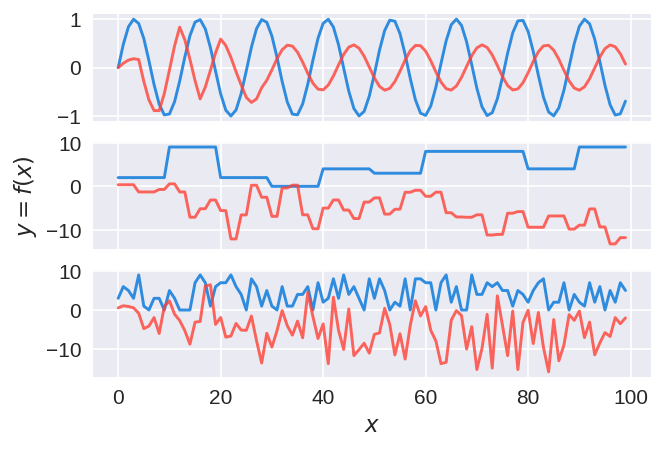

In [56]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №6b. Нелинейная функция с памятью

### Задание 1

Нелинейная функция с памятью:
$$ y[n] = f(x[n], x[n - d],..., x[n - (h - 1)\cdot d]) $$
где $h$ – ширина окна, $d$ – глубина задержек.

In [57]:
h = 3
d = 2
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(N):
        idx = np.arange(n, n - h * d, -d)
        expr = idx >= 0
        good_idx = idx[expr]
        Y[n] = np.sqrt(np.sum(X[good_idx] ** 2))
    return Y

### Задание 2

Подадим несколько вариантов входных сигналов: гармонический, ступенчато изменяющийся и случайный. Изобразим сформированные входные (синим цветом) и выходные (красным цветом) сигналы.

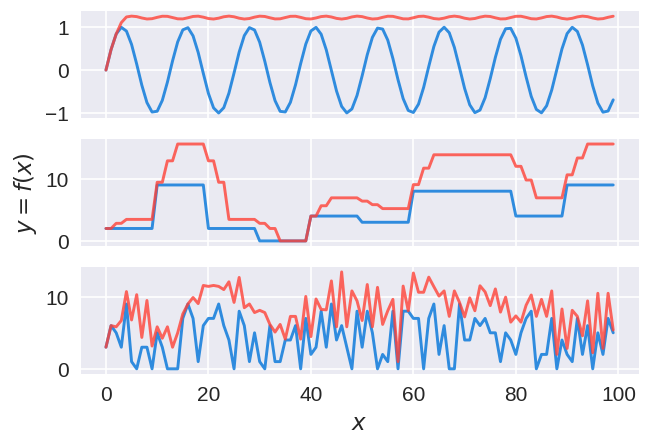

In [58]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №7. Линейное разностное уравнение

### Задание 1

Зададим линейное разностное уравнение
$$y[n] = (z_1 + z_2) \cdot y[n-1] - z_1 \cdot z_2 \cdot y[n-2] + k_1 \cdot X[n] + k_2 \cdot X[n-1] $$
где $z_1, z_2, k_1, k_2$ – некоторые коэффициенты.

In [59]:
z1, z2 = 0.5, -0.5
k1, k2 = 0.25, 0.5

In [60]:
def fun(X):
    N = X.shape[0]
    Y = np.zeros(N)
    for n in range(2, N):
        Y[n] = (z1 + z2) * Y[n-1] - z1 * z2 * Y[n-2] + k1 * X[n] + k2 * X[n-1]
    return Y

### Задание 2

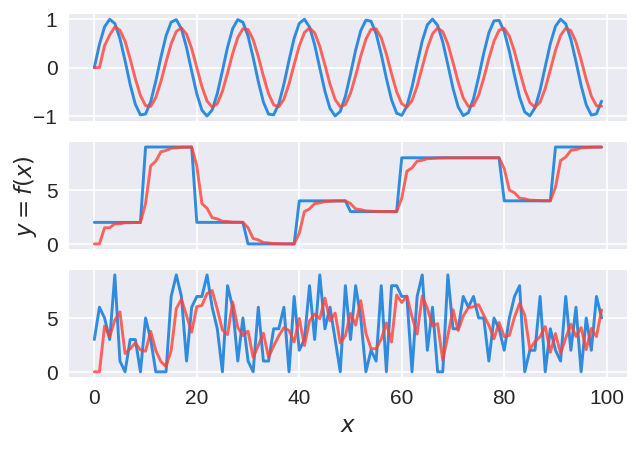

In [61]:
Y1 = fun(X1)
Y2 = fun(X2)
Y3 = fun(X3)

draw_series(seq, X1, Y1, X2, Y2, X3, Y3)

## №8. Многомерные образы

### Задание 1

Для задачи классификации будем использовать набор, встроенный в библиотеку scikit для языка программирования Python. Набор включает в себя 1797 черно-белых изображений рукописных цифр (то есть 10 классов) размером $8 \times 8$ пикселей.

(1797, 64)


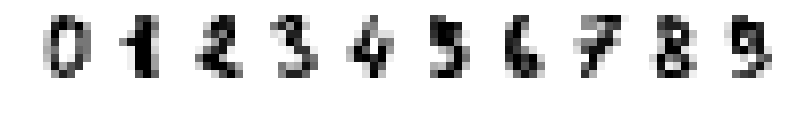

In [62]:
digits = load_digits() # 8x8 pictures
print(digits.data.shape)

fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.axis('off')
save()
plt.show() 

### Задание 2

Примеры образов, зашумленных с разной степенью интенсивности относительно исходных

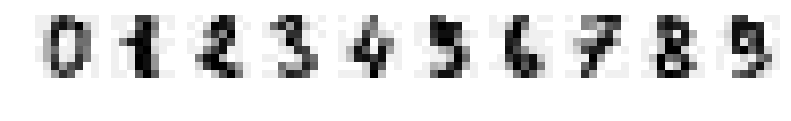

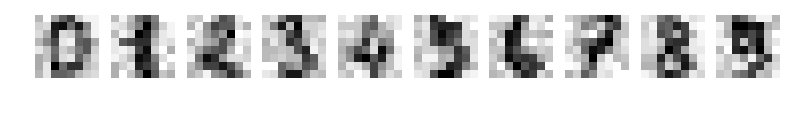

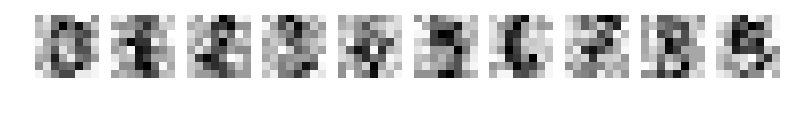

In [63]:
for k in np.arange(1, 10, 3):
    fig = plt.figure(figsize=(8, 2), dpi=120)
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        noise = digits.images[i] + np.random.randint(-k, k, size=(8, 8))
        plt.imshow(noise, cmap=plt.cm.gray_r)
        plt.axis('off')
    save()
    plt.show()

Примеры образов, имеющих геометрические искажения (поворот на различный угол).

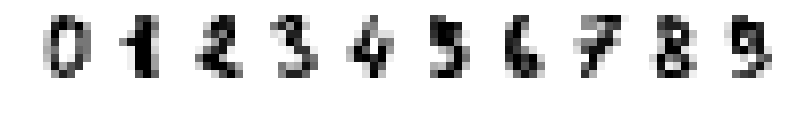

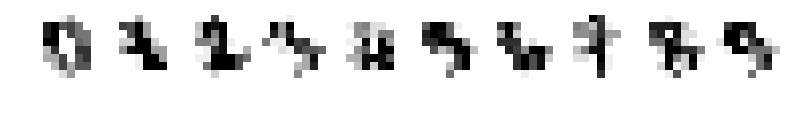

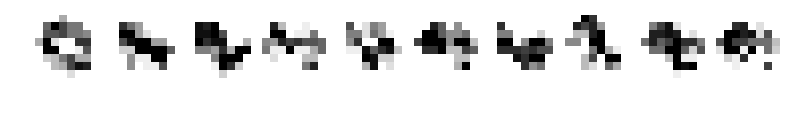

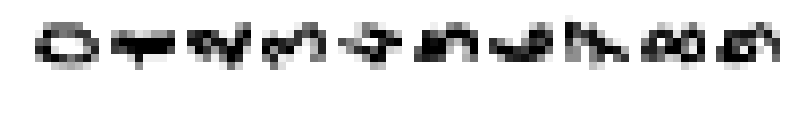

In [64]:
for alpha in np.linspace(0, 90, 4):
    fig = plt.figure(figsize=(8, 2), dpi=120)
    for i in range(10):
        fig.add_subplot(1, 10, i + 1)
        rot = rotate(digits.images[i], alpha, reshape=False, order=0)
        plt.imshow(rot, cmap=plt.cm.gray_r)
        plt.axis('off')
    save()
    plt.show()

Образы, являющиеся некоторой частью от исходных.

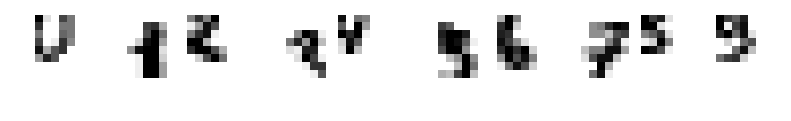

In [65]:
fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    s = np.random.randint(-3, 3)
    shifted = shift(digits.images[i], s, prefilter=False, order=0)
    r = np.random.randint(-60, 60)
    rotated = rotate(shifted, r, reshape=False, prefilter=False, order=0)
    plt.imshow(shifted, cmap=plt.cm.gray_r)
    plt.axis('off')
save()
plt.show()